In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
T = 100000
N = 100
b = 3
x,y,z = np.zeros([T,N+1]),np.zeros([T,N+1]),np.zeros([T,N+1])
with open(f'simulation_FJC_b=3.0_N=100_T=100000.xyz','r') as f:
    for t in range(T):
        line1 = f.readline()
        line2 = f.readline()
        for i in range(N+1):
            data = f.readline()
            values = data.split( )
            x[t,i] = float(values[1])
            y[t,i] = float(values[2])
            z[t,i] = float(values[3])

In [4]:
Rg_2 = []
for i in range(T):
    x_cm = np.mean(x[i,:])
    y_cm = np.mean(y[i,:])
    z_cm = np.mean(z[i,:])
    rg_2 = np.mean((x[i,:]-x_cm)**2 + (y[i,:]-y_cm)**2 + (z[i,:]-z_cm)**2)
    Rg_2.append(rg_2)

In [5]:
Q = []
for i in range(T):
    Q.append((x[i,-1]-x[i,0])**2 + (y[i,-1]-y[i,0])**2 + (z[i,-1]-z[i,0])**2)

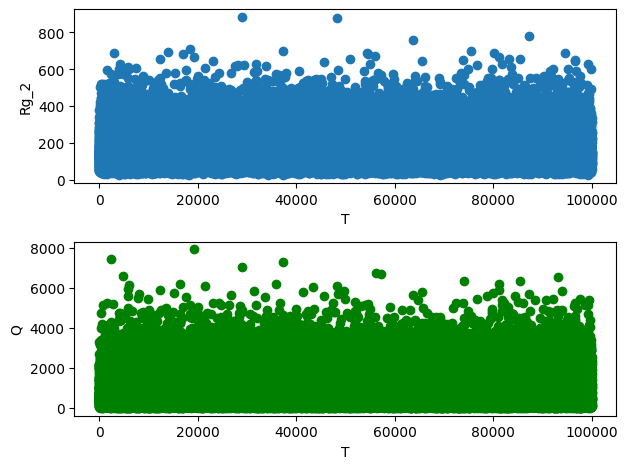

In [6]:
time = np.arange(0,T)

plt.subplot(2,1,1)
plt.scatter(time,Rg_2)
plt.xlabel('T')
plt.ylabel('Rg_2')

plt.subplot(2,1,2)
plt.scatter(time,Q,color='g')
plt.xlabel('T')
plt.ylabel('Q')
plt.tight_layout()

In [7]:
Q_theory = N*b*b
Q_est = np.mean(Q)
print(f'Q theroetical is {Q_theory} and Q experimental is {Q_est}')

Q theroetical is 900 and Q experimental is 902.37962179903


In [58]:
Prob_Q = []
sqr_Q = [np.sqrt(Q[i]) for i in range(len(Q))]
for q in sqr_Q:
    P = 4*np.pi*q*q*(3/(2*np.pi*N*b*b))**(3/2) * np.exp((-3*q*q)/(2*N*b*b))
    Prob_Q.append(P)
Q_hist, bin_edges = np.histogram(sqr_Q,bins=50)

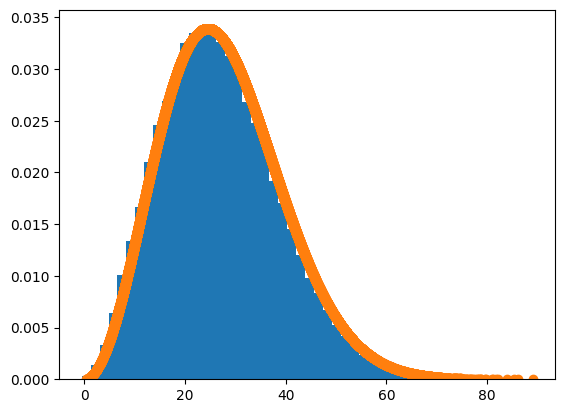

In [67]:
plt.bar(bin_edges[:-1], Q_hist/T/np.diff(bin_edges), width=np.diff(bin_edges))
plt.scatter(sqr_Q,Prob_Q)